In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import shapiro

%matplotlib inline

In [5]:
df = pd.read_csv('../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [ ]:
comp_comb = df[df['VClass'] == 'Compact Cars']['comb']
comp_comb.describe()

count    1122.000000
mean       26.504232
std         5.558006
min        13.780100
25%        23.131750
50%        26.494650
75%        29.878200
max        49.568500
Name: comb, dtype: float64

### Example 0 - Plot hypothetical distribution over bar chart

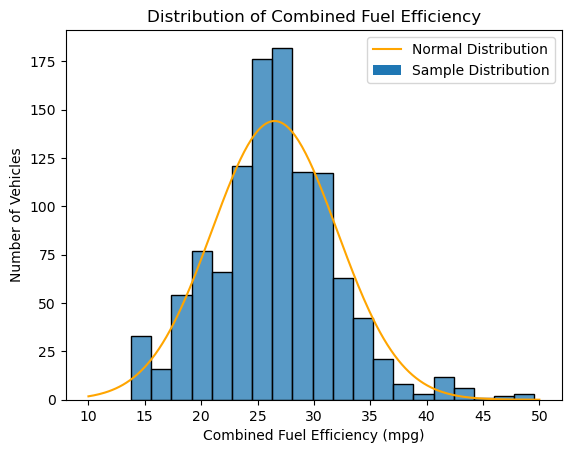

In [ ]:
# Create a histogram of the Fuel Economy Data
bin_size = (comp_comb.max() - comp_comb.min()) / 20
bins = np.arange(comp_comb.min(), comp_comb.max() + bin_size, bin_size)
sns.histplot(data=comp_comb.reset_index(), x='comb', bins=bins);
# plt.hist(data=comp_comb.reset_index(), x='comb', bins=bins)
# comp_comb.hist(bins=bins)

# Overlay a theoretical normal distribution on top
mu = comp_comb.mean()
sigma = comp_comb.std()
x = np.linspace(10, 50, 250)
y = norm.pdf(x, mu, sigma) # normal distribution heights
y *= comp_comb.shape[0] * bin_size # scale the distribution height

plt.plot(x, y, color='orange')
plt.xlabel('Combined Fuel Efficiency (mpg)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Combined Fuel Efficiency')
plt.legend(['Normal Distribution', 'Sample Distribution']);

### Example 0a - Test for normality with the Shapiro-Wilk Test

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro(comp_comb)

ShapiroResult(statistic=0.9766612648963928, pvalue=1.8064653505706074e-12)

With a $p \lt 0.05$, we should conclude that our data was not drawn from a normal distribution.

Text(0, 0.5, 'Observed Values')

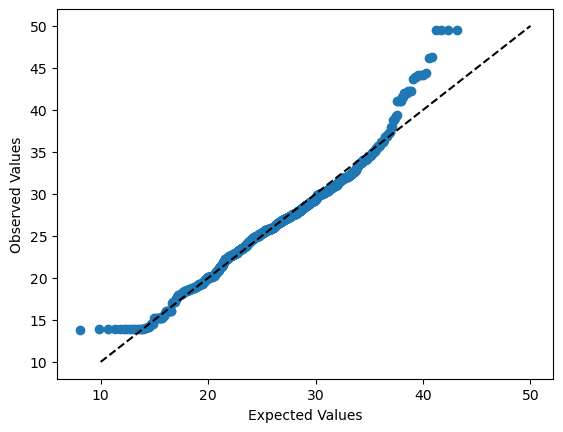

In [ ]:
n_points = comp_comb.shape[0]
qs = (np.arange(n_points) - 0.5) / n_points
expected_vals = norm.ppf(qs, comp_comb.mean(), comp_comb.std())

plt.scatter(expected_vals, comp_comb.sort_values())
plt.plot([10, 50], [10, 50], color='black', linestyle='--')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

### Example 2 - Standardized Units

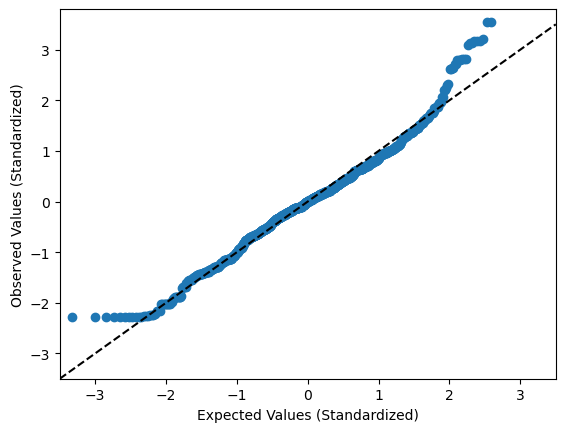

In [ ]:
expected_scores = norm.ppf(qs)
observed_standardized = (comp_comb.sort_values() - comp_comb.mean()) / comp_comb.std()

plt.scatter(expected_scores, observed_standardized)
plt.plot([-3.5, 3.5], [-3.5, 3.5], color='black', linestyle='--')
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.8)
plt.xlabel('Expected Values (Standardized)')
plt.ylabel('Observed Values (Standardized)');

### Example 3 - Non-uniform Data

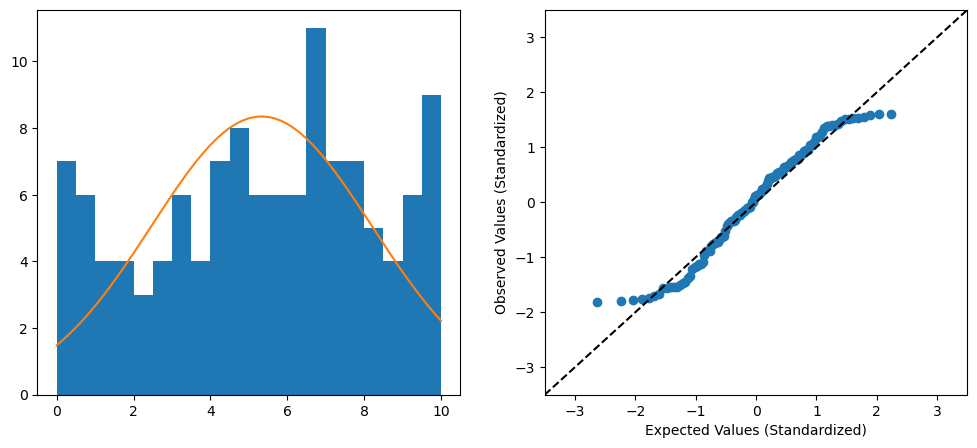

In [ ]:
# Generate the data
np.random.seed(8322489)
n_points = 120
unif_data = np.random.uniform(0, 10, n_points)

# Set up the figure
plt.figure(figsize=(12, 5))

# Left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(unif_data, bins=bin_edges)

# overlay a normal distribution on top
samp_mean = unif_data.mean()
samp_std = unif_data.std()

x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_std) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)

# Right subplot: plot the Q-Q plot (expected values vs. the observed values)
plt.subplot(1, 2, 2)
qs = (np.arange(n_points) - 0.5) / n_points
expected_vals = norm.ppf(qs)
observed_vals = (np.sort(unif_data) - samp_mean) / samp_std

plt.scatter(expected_vals, observed_vals)
plt.plot([-3.5, 3.5], [-3.5, 3.5], color='black', linestyle='--')
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.xlabel('Expected Values (Standardized)')
plt.ylabel('Observed Values (Standardized)');

When we compare the random standardized scores drawn from the uniform distribution to the expected scores from the theoretical normal distribution in the Q-Q plot, we see an S-shaped curve. The comparison of values in the middle of the curve are approximately linear in trend, but the slope is steeper than the desired y = x. Meanwhile on the edges, the slope is extremely shallow, as the uniform distribution is fixed to a finite range, but the normal distribution values in the tails are expected to be much further away. You can somewhat see this in the superimposed distribution line in the left-side plot, where even at the edges of the data, there is still quite a bit of height to the theoretical normal curve. All of this contributes to the result that the randomly-generated uniform data can't be well-approximated by the normal distribution.